## Conference plots
- Descriptives
- Avg LDL and Avg HL boxplot & t test
- TWI con HA y línea punteada de Avg controls (con referencia, Individual differences cecere.)
- TWI con HA y linea punteada de low schizotypy group (high proneness (ferri))
- OPI con HA y linea punteada de low schizotypy group (high proneness (ferri))
- HL mean HA vs healthy person range
- HL mean HA vs mean young adults Korea

### Imports and preprocess

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pingouin as pg

from functions import sig, alter_sig, sigfit, alter_sigfit

pd.options.mode.chained_assignment = None  # Stop seeing warnings

df = pd.read_pickle("data/df")

df_HA = df[df["Group"] == "HA"]
df_Control = df[df["Group"] == "Control"]

In [5]:
df.loc[df["Group"] == "HA", "Group"] = "AC"  # rename columns
df_HA["Group"] = "AC"
df_Control = df[df["Group"] == "Control"]

### Descriptives

In [6]:
df.groupby("Group").describe()

Age                                                 AQ_TOTAL        \
        count   mean       std   min    25%   50%   75%   max    count  mean   
Group                                                                          
AC       25.0  17.20  0.763763  16.0  17.00  17.0  18.0  18.0     25.0  4.96   
Control   4.0  18.75  0.500000  18.0  18.75  19.0  19.0  19.0      4.0  4.25   

         ...  Avg_HL_R            Avg_HL                                \
         ...       75%        max  count      mean       std       min   
Group    ...                                                             
AC       ...  9.583333  18.333333   19.0  6.096491  5.248843 -0.833333   
Control  ...  8.541667  14.166667    4.0  5.416667  6.544011 -1.666667   

                                                  
              25%       50%       75%        max  
Group                                             
AC       1.250000  6.666667  8.750000  18.333333  
Control  2.708333  4.583333  7.291667  14.166667  

[2 rows x 256 columns]

In [7]:
df.groupby(["Group", "Scholarship"]).count()

Código de participante  Sex  \
Group   Scholarship                                                           
AC      Beca Lucet                                                   2    2   
        Becas Lucet                                                  2    2   
        Si, Becas Lucet (PUCP)                                       1    1   
        Si, soy beneficiario de la beca Lucet.                       1    1   
        Sí, Becas Lucet                                              1    1   
        Sí, becas Lucet                                              1    1   
Control BECA18                                                       1    1   
        No                                                           1    1   
        RPU-Movilidad Estudiantil                                    1    1   
        no                                                           1    1   

                                                Age  EL  Occupation  \
Group   Scholarship                                                   
AC      Beca Lucet                                2   2           2   
        Becas Lucet                               2   2           2   
        Si, Becas Lucet (PUCP)                    1   1           1   
        Si, soy beneficiario de la beca Lucet.    1   1           1   
        Sí, Becas Lucet                           1   1           1   
        Sí, becas Lucet                           1   1           1   
Control BECA18                                    1   1           1   
        No                                        1   1           1   
        RPU-Movilidad Estudiantil                 1   1           1   
        no                                        1   1           1   

                                                Neurological_D  Conditions  \
Group   Scholarship                                                          
AC      Beca Lucet                                           2           2   
        Becas Lucet                                          2           2   
        Si, Becas Lucet (PUCP)                               1           1   
        Si, soy beneficiario de la beca Lucet.               1           1   
        Sí, Becas Lucet                                      1           1   
        Sí, becas Lucet                                      1           1   
Control BECA18                                               1           1   
        No                                                   1           1   
        RPU-Movilidad Estudiantil                            1           1   
        no                                                   1           1   

                                                Prob_Vision  Prob_Aud  \
Group   Scholarship                                                     
AC      Beca Lucet                                        2         2   
        Becas Lucet                                       2         2   
        Si, Becas Lucet (PUCP)                            1         1   
        Si, soy beneficiario de la beca Lucet.            1         1   
        Sí, Becas Lucet                                   1         1   
        Sí, becas Lucet                                   1         1   
Control BECA18                                            1         1   
        No                                                1         1   
        RPU-Movilidad Estudiantil                         1         1   
        no                                                1         1   

                                                Psiq_diag  ...  HL_250  \
Group   Scholarship                                        ...           
AC      Beca Lucet                                      2  ...       1   
        Becas Lucet                                     2  ...       0   
        Si, Becas Lucet (PUCP)                          1  ...       0   
        Si, soy beneficiario de la beca Lucet.          1  ...

In [8]:
df.groupby(["Group", "Sex"]).count()

Código de participante  Age  EL  Occupation  Scholarship  \
Group   Sex                                                                   
AC      Femenino                       18   18  18          18            7   
        Masculino                       7    7   7           7            1   
Control Femenino                        3    3   3           3            3   
        Masculino                       1    1   1           1            1   

                   Neurological_D  Conditions  Prob_Vision  Prob_Aud  \
Group   Sex                                                            
AC      Femenino               18          18           18        18   
        Masculino               7           7            7         7   
Control Femenino                3           3            3         3   
        Masculino               1           1            1         1   

                   Psiq_diag  ...  HL_250  HL_500  HL_1000  HL_2000  HL_4000  \
Group   Sex                   ...                                              
AC      Femenino          18  ...      13      13       13       13       13   
        Masculino          7  ...       6       6        6        6        6   
Control Femenino           3  ...       3       3        3        3        3   
        Masculino          1  ...       1       1        1        1        1   

                   HL_8000  Avg_LDL  Avg_HL_L  Avg_HL_R  Avg_HL  
Group   Sex                                                      
AC      Femenino        13       13        13        13      13  
        Masculino        6        6         6         6       6  
Control Femenino         3        3         3         3       3  
        Masculino        1        1         1         1       1  

[4 rows x 47 columns]

### Avg LDL and Avg HL boxplot & t-test

t test for Avg_LDL


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.952639,3.568238,two-sided,0.131127,"[-14.66, 74.23]",1.421499,1.463,0.693054


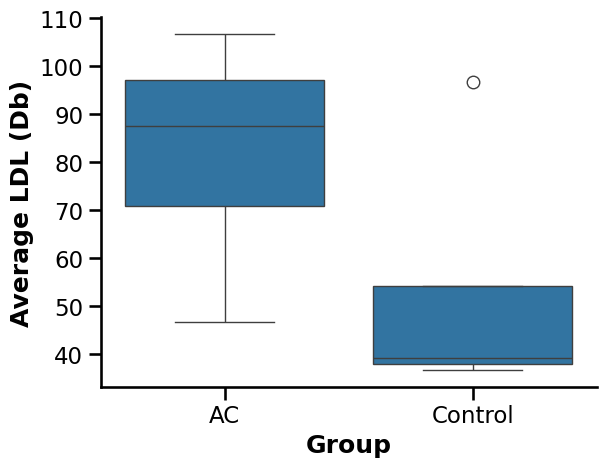

In [9]:
measurement = "Avg_LDL"
print("t test for %s" % (measurement))
display(pg.ttest(df_HA[measurement], df_Control[measurement]))

sns.set_context("talk")
fig = sns.boxplot(data=df, x="Group", y=measurement)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
# fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel(
    "Average LDL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})

plt.show()

t test for Avg_HL


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.194985,3.855881,two-sided,0.855245,"[-9.14, 10.5]",0.124676,0.459,0.055385


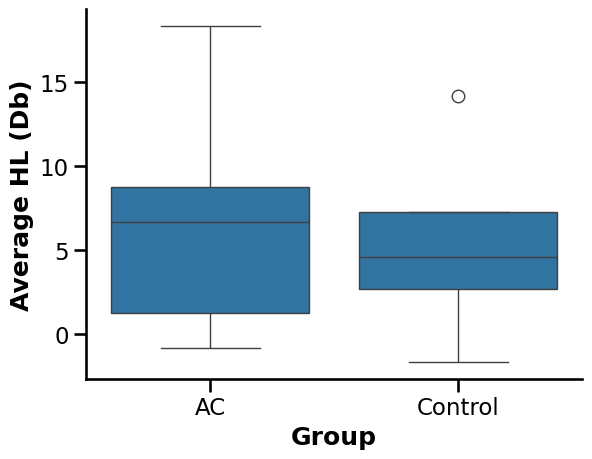

In [10]:
measurement = "Avg_HL"
print("t test for %s" % (measurement))
display(pg.ttest(df_HA[measurement], df_Control[measurement]))

sns.set_context("talk")
fig = sns.boxplot(data=df, x="Group", y=measurement)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
# fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel(
    "Average HL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})

plt.show()

### TWI con HA y línea punteada de Avg controls (Cecere et al., 2015 y Ferri et al., 2018)

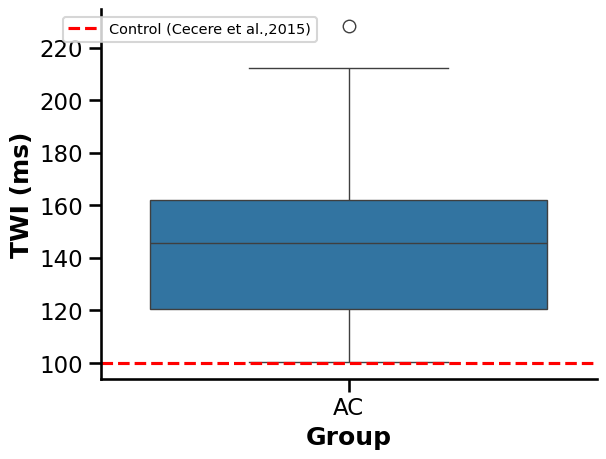

In [11]:
sns.set_context("talk")
fig = sns.boxplot(data=df_HA, x="Group", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})
plt.axhline(100, label="Control (Cecere et al.,2015)", c="r", linestyle="--")
fig.legend(fontsize="xx-small", bbox_to_anchor=(0.45, 1))
plt.show()

Por si quieres ver TWI con low schizotypy según Ferri

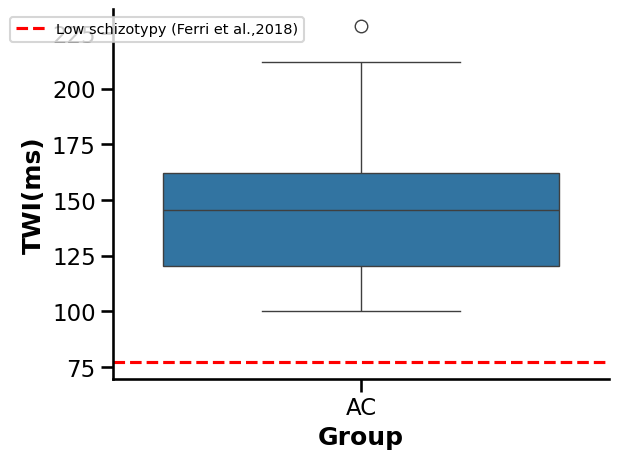

In [12]:
sns.set_context("talk")
fig = sns.boxplot(data=df_HA, x="Group", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("TWI(ms)", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})
plt.axhline(77.14, label="Low schizotypy (Ferri et al.,2018)", c="r", linestyle="--")
fig.legend(fontsize="xx-small", bbox_to_anchor=(0.4, 1))
plt.show()

### OPI con HA y línea punteada de Avg low schizotypy group (Ferri et al., 2018)

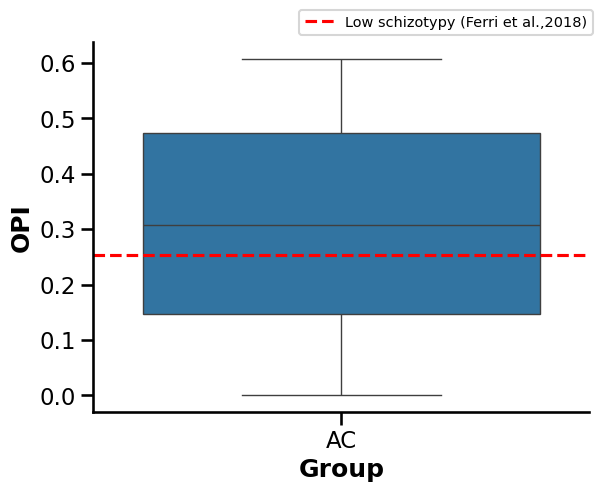

In [13]:
sns.set_context("talk")
fig = sns.boxplot(data=df_HA, x="Group", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("OPI", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})
plt.axhline(0.2524, label="Low schizotypy (Ferri et al.,2018)", c="r", linestyle="--")
fig.legend(fontsize="xx-small", bbox_to_anchor=(0.4, 1))
plt.show()

### Frequency mean for healthy person vs HA

Creo que este plot no va a servir mucho. En el manual de audiometría no hay rangos "normales", solo hay de diferentes grados de sordera. Cuando busqué, el "normal hearing range" es demasiado amplio y es el mismo para todas las frecuencias. Además, en lo que encontré no salían ni 250 ni 8000. 

#### Preprocessing

In [14]:
df_pointplots = df[
    [
        "Código de participante",
        "Group",
        "LDL_250",
        "LDL_500",
        "LDL_1000",
        "LDL_2000",
        "LDL_4000",
        "LDL_8000",
        "LDL_Ear",
        "HL_250_R",
        "HL_500_R",
        "HL_1000_R",
        "HL_2000_R",
        "HL_4000_R",
        "HL_8000_R",
        "HL_250_L",
        "HL_500_L",
        "HL_1000_L",
        "HL_2000_L",
        "HL_4000_L",
        "HL_8000_L",
        "HL_250",
        "HL_500",
        "HL_1000",
        "HL_2000",
        "HL_4000",
        "HL_8000",
    ]
]

In [15]:
# Split groups
df_pointplots_HA = df_pointplots[df_pointplots["Group"] == "AC"]
df_pointplots_control = df_pointplots[df_pointplots["Group"] == "Control"]

# Melt for HA
df_pointplots_HA = pd.melt(
    df_pointplots_HA,
    id_vars=["Código de participante"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_HA["Group"] = "AC"

# Rename columns
df_pointplots_HA.columns = ["ID", "Frequency", "Db", "Group"]

In [16]:
df_pointplots_HA = df_pointplots_HA[df_pointplots_HA["Frequency"] != "HL_8000"]
df_pointplots_HA = df_pointplots_HA[df_pointplots_HA["Frequency"] != "HL_250"]

In [17]:
df_pointplots_HA["Frequency"].unique()

array(['HL_500', 'HL_1000', 'HL_2000', 'HL_4000'], dtype=object)

#### Plot

/tmp/ipykernel_14843/1656508764.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([500, 1000, 2000, 4000])


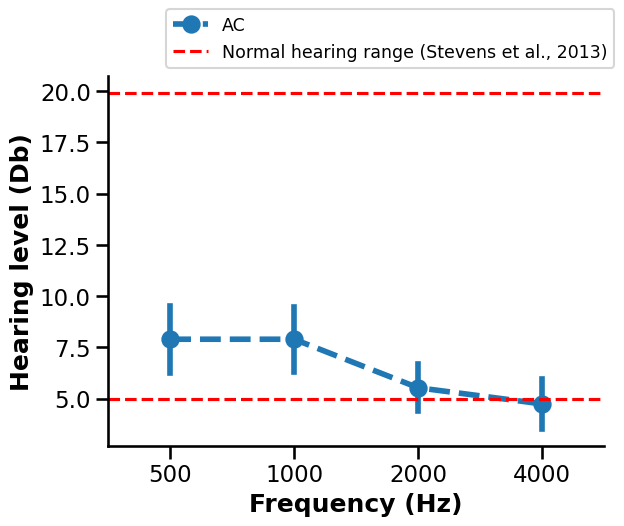

In [18]:
sns.set_context("talk")

fig = sns.pointplot(
    data=df_pointplots_HA,
    x="Frequency",
    y="Db",
    linestyles="--",
    errorbar="se",
    dodge=True,
    label="AC",
)
# plt.title("Hearing Level (Db) per Frequency (Hz)")
fig.set_xticklabels([500, 1000, 2000, 4000])
# plt.xticks(['HL_250', 'HL_500', 'HL_1000', 'HL_2000', 'HL_4000', 'HL_8000'], [250, 'HL_500', 'HL_1000','HL_2000', 'HL_4000', 'HL_8000'])
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})
fig.set_ylabel("Hearing level (Db)", fontdict={"weight": "bold"})
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)

# handles, labels = fig.get_legend_handles_labels()
# fig.legend(handles=handles[2:], labels=labels[2:])
plt.axhline(
    5, label="Normal hearing range (Stevens et al., 2013)", c="r", linestyle="--"
)

plt.axhline(19.9, c="r", linestyle="--")
fig.legend(fontsize="x-small", bbox_to_anchor=(0.1, 1))
plt.show()

### Average HC and 20s adults from korea

En este paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10808389/ encontre data de varios países. Aparentemente el HL varía por país. En la búsqueda que hice no encontré datos de Perú. Estoy poniendo abajo la media de Korea porque fue la más straightforward. Hay de otros lugares separado por frecuencia pero también separan por sexo y la situación se empieza a poner engorrosa. Nuevamente, parece varía considerablemente por país, con lo cual no creo que este promedio de Korea nos sirva de mucho, pero igual lo dejo.

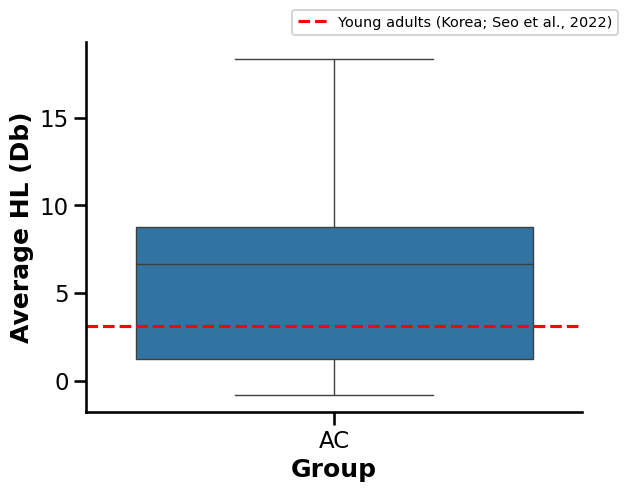

In [19]:
measurement = "Avg_HL"

sns.set_context("talk")
fig = sns.boxplot(data=df_HA, x="Group", y=measurement)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
# fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel(
    "Average HL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("Group", fontdict={"weight": "bold"})
plt.axhline(3.1, label="Young adults (Korea; Seo et al., 2022)", c="r", linestyle="--")
fig.legend(fontsize="xx-small", bbox_to_anchor=(0.4, 1))
plt.show()